In [22]:
# STEP 1: Setup - Import Libraries and Mount Drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression



In [16]:
# Load CSV file
path = '/content/drive/MyDrive/AIPyhton/student_dropout.csv'
df = pd.read_csv(path)

# Display first few rows
df.head()


# # Preview and check for missing values
# print("First 5 rows:\n", df.head())
print("\nColumn names:\n", df.columns)
# print("\nMissing values:\n", df.isnull().sum())



Column names:
 Index(['attendance', 'grades', 'participation', 'dropout_risk'], dtype='object')


In [17]:
# Check for missing values
print(df.isnull().sum())

# Convert categorical column 'dropout_risk' to dummy variable
df = pd.get_dummies(df, drop_first=True)

# After get_dummies, the column becomes 'dropout_risk_yes' (1 = dropout, 0 = not dropout)
X = df.drop('dropout_risk_yes', axis=1)
y = df['dropout_risk_yes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


attendance       0
grades           0
participation    0
dropout_risk     0
dtype: int64


In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [24]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)


Accuracy: 0.45
Precision: 0.35714285714285715
Recall: 0.7142857142857143


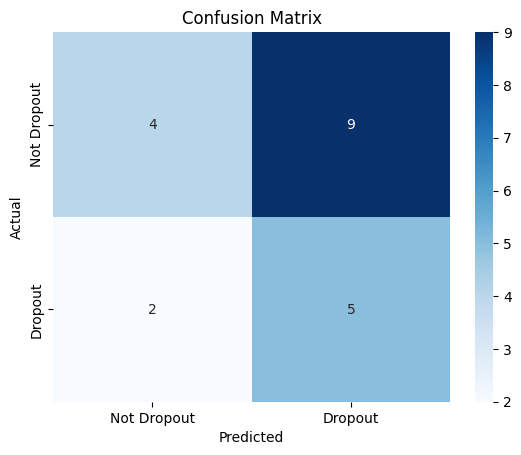

In [25]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Dropout', 'Dropout'],
            yticklabels=['Not Dropout', 'Dropout'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
